<a href="https://colab.research.google.com/github/ekxhta/SMS-Spam-Classification/blob/main/SMS_Spam_Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMS SPAM CLASSIFICATION**

The SMS Spam Classification project aims to develop a Supervised machine learning model that can accurately classify SMS messages as either spam or ham (non-spam). Utilizing a labeled dataset, this project implements various machine learning techniques to preprocess the data, extract relevant features, and train a classification model.
<br> <br>
 **Dataset:**
 - The dataset consists of SMS messages categorized into two classes: 'spam' and 'ham.' Each entry includes the following columns:

  - Class: The category of the message (spam or ham).
  - Message: The content of the SMS message.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from google.colab import files
uploaded=files.upload()

Saving Spam_SMS.csv to Spam_SMS (3).csv


In [ ]:
df=pd.read_csv('Spam_SMS.csv')

In [ ]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5574, 2)

#### **Since the dataset has been imported into a pandas dataframe, we would follow the following steps to ultimately build our classification model.**

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building And Evaluation




 ------





### **1. DATA CLEANING**
This step involves getting rid of null and duplicate values or substituting missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df['Class'] = df['Class'].map({'ham': 0, 'spam': 1})


In [ ]:
df.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum() #check if any missing values

,0
Class,0
Message,0


In [ ]:
df.duplicated().sum() #duplicate values

415

In [ ]:
df=df.drop_duplicates(keep='first') #keep only first occurences of duplicate value
df.duplicated().sum()

0

In [ ]:
df.shape

(5159, 2)



---



### **2. EXPLORATORY DATA ANALYSIS**
Analyzing given data to derive meanigful information and insights, understand it so it helps build the model.

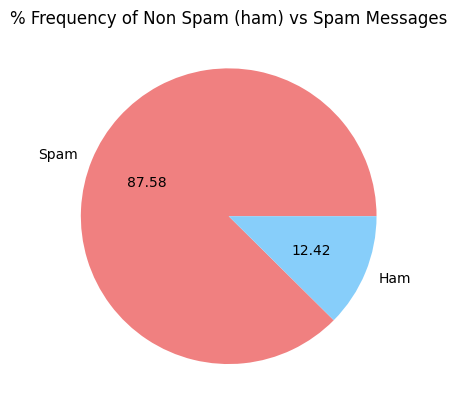

In [ ]:
freq=df['Class'].value_counts()

plt.pie(freq,labels=['Spam','Ham'],colors=['lightcoral','lightskyblue'],autopct='%0.2f')
plt.title('% Frequency of Non Spam (ham) vs Spam Messages')
plt.show()

**Since we are dealing with Natural Language, we might find it helpful to know the content of the message. For this we need the *Natural Language Toolkit***

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.drop(['num_characters','num_words','num_sentences'],axis=1,inplace=True)

In [ ]:
 #no of characters in each message

df['chars']=df['Message'].apply(len)
df.head()

,Class,Message,chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Class,Message,chars,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
 #for ham
df[df['Class']==0][['chars','words','sentences']].describe()

,chars,words,sentences
count,4518.000000,4518.000000,4518.000000
mean,70.861000,17.302125,1.827579
std,56.584513,13.592056,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for spam
df[df['Class']==1][['chars','words','sentences']].describe()

,chars,words,sentences
count,641.000000,641.000000,641.000000
mean,137.413417,27.722309,2.979719
std,29.998996,7.032577,1.483627
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


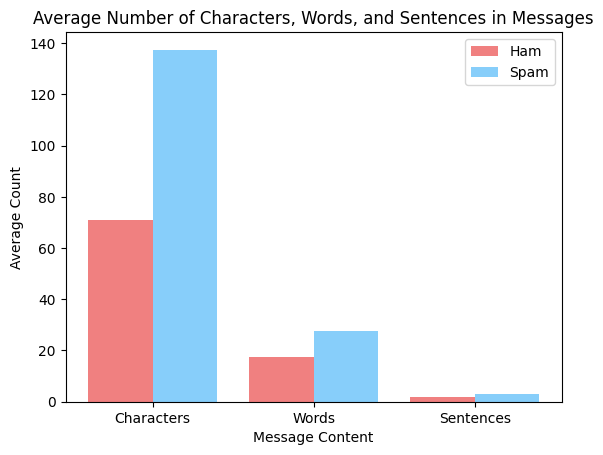

In [ ]:

ham_char = df[df['Class'] == 0]['chars'].mean()
spam_char = df[df['Class'] == 1]['chars'].mean()

ham_words = df[df['Class'] == 0]['words'].mean()
spam_words = df[df['Class'] == 1]['words'].mean()

ham_sent = df[df['Class'] == 0]['sentences'].mean()
spam_sent = df[df['Class'] == 1]['sentences'].mean()


ham_averages = [ham_char, ham_words, ham_sent]
spam_averages = [spam_char, spam_words, spam_sent]

labels = ['Characters', 'Words', 'Sentences']


x = range(len(labels))

plt.bar(x, ham_averages, width=0.4, label='Ham', color='lightcoral', align='center')
plt.bar([i + 0.4 for i in x], spam_averages, width=0.4, label='Spam', color='lightskyblue', align='center')

plt.xlabel('Message Content')
plt.ylabel('Average Count')
plt.title('Average Number of Characters, Words, and Sentences in Messages')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()


**INSIGHTS OBTAINED : AVG NO OF CHARACTERS, WORDS AND SENTENCES IN MESSAGES**
<BR>Through the exploratory data analysis of the SMS dataset, we observed that the average number of characters, words, and sentences in messages categorized as "ham" (non-spam) is greater than those in "spam" messages.
- SPAM messages are thus more concise.

In [ ]:
df.dtypes

,0
Class,int64
Message,object
chars,int64
words,int64
sentences,int64


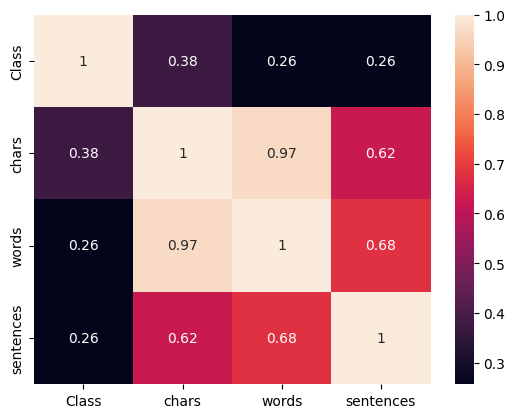

In [ ]:
numeric_df=df.select_dtypes(include=['int64','float64'])
correlation_matrix=numeric_df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

**Best correlation is of *num_characters* :** This moderate positive correlation suggests that as the number of characters in a message increases, the likelihood of it being classified as "ham" (non-spam) also increases. This indicates that spam messages tend to be shorter and more concise.



---




### **3. DATA PREPROCESSING**
In our natural language processing of SMS messages, we perform the following data preprocessing steps to prepare the data for model building:

**a. Lowercase Conversion:** All text is converted to lowercase to ensure uniformity, allowing for consistent matching of words.

**b. Tokenization:** The text is split into individual tokens (words) to facilitate analysis and modeling.

**c. Removing Special Characters:** Any special characters, symbols, or numbers that do not contribute to the meaning of the text are removed.

**d. Removing Stop Words and Punctuation:** Common stop words (e.g., "and," "the," "is") and punctuation marks are eliminated to focus on the most relevant words in the messages.

**e. Stemming:** Words are reduced to their root forms to standardize variations (e.g., "running" becomes "run"), helping to consolidate similar terms.

These preprocessing steps are essential for improving the quality of the data, enhancing the model's performance, and ensuring more accurate classifications of messages.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
stops=stopwords.words('english')

import string
puncs=string.punctuation

from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [ ]:
def data_preprocessor(msgs):
  msgs=msgs.lower()
  word=word_tokenize(msgs)
  word=[i for i in word if i.isalnum() and i not in puncs and i not in stops]
  stemmed_words=[stemmer.stem(i) for i in word]

  return ' '.join(stemmed_words)


In [ ]:
data_preprocessor("Congratulations! You've won a lottery of $1000. Click here to claim.")

'congratul lotteri 1000 click claim'

In [ ]:
df['processed_msg']=df['Message'].apply(data_preprocessor)
df.head()

,Class,Message,chars,words,sentences,processed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### **Most commonly occuring Spam Words**
**Now , with this preprocessed data we can interpet some commonly occuring words in Spam messages.**
**We cluster all our spam messages into a list *spam_words* and traverse through each word to find their count**


In [ ]:
spam_words=[]

for msg in df[df['Class']==1]['processed_msg'].to_list():
  for word in msg.split():
    spam_words.append(word)

In [ ]:
from collections import Counter
dict(Counter(spam_words).most_common(30))

{'call': 313,
 'free': 186,
 '2': 154,
 'txt': 139,
 'text': 122,
 'ur': 119,
 'u': 118,
 'mobil': 110,
 'stop': 108,
 'repli': 102,
 'claim': 97,
 '4': 95,
 'prize': 79,
 'get': 73,
 'new': 64,
 'servic': 64,
 'send': 60,
 'tone': 59,
 'urgent': 57,
 'award': 55,
 'nokia': 54,
 'contact': 54,
 'phone': 52,
 'cash': 50,
 'pleas': 50,
 'week': 49,
 'win': 45,
 'min': 45,
 'c': 43,
 'guarante': 42}

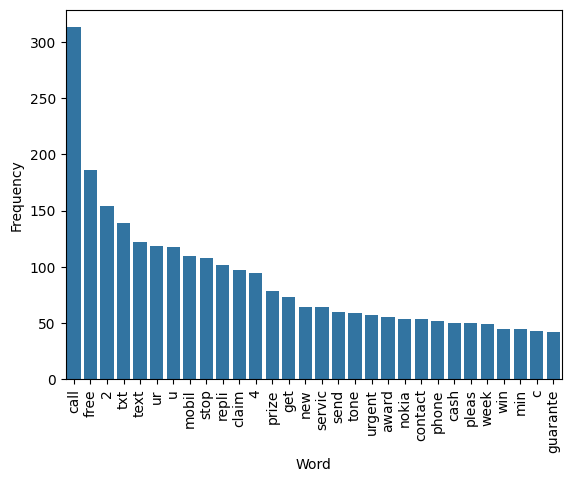

In [ ]:
x=pd.DataFrame(Counter(spam_words).most_common(30))[0]
y=pd.DataFrame(Counter(spam_words).most_common(30))[1]
sns.barplot(x='Word',y='Frequency',data=pd.DataFrame({'Word':x,'Frequency':y}))
plt.xticks(rotation=90)
plt.show()



---



### **4. MODEL BUILDING AND ACCURACY CHECK**

Any machine leanring model requires it's inputs to be numeric. In our case,Although our output ie. spam/ham has been encoded to numeric. the **input** 'Message' **is textual ie non-numeric.**
<br>
Thus to obtain required input, we vectorize the data.
<br>
**Vectorization** is a process in machine learning and natural language processing (NLP) where we convert textual data (like words or sentences) into numerical format (vectors) that a computer can understand and process

        Vectorization methods:
        1. Bag of Words
        2. TF-IDF
        3. Word Embeddings

Here we use **Bag of words** methodology where  we create a "bag" of all unique words in the dataset. Each text is then represented as a vector, where each position corresponds to a unique word from the bag.
The value in each position can represent the frequency of that word in the document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(df['processed_msg']).toarray()
X.shape
y= df['Class'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)

**After vectorization and splitting the dataset into training and testing sets, we proceeded to choose a classification model. We selected Logistic Regression and Random Forest**
- Logistic Regression, as a linear model, offers simplicity and interpretability, making it a good baseline for comparison
- Random Forest, an ensemble method, enhances classification by aggregating the predictions of multiple decision trees

## **Using Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

accuracy=accuracy_score(y_test,predictions)
print("Accuracy: ",accuracy)

Accuracy:  0.9725913621262459


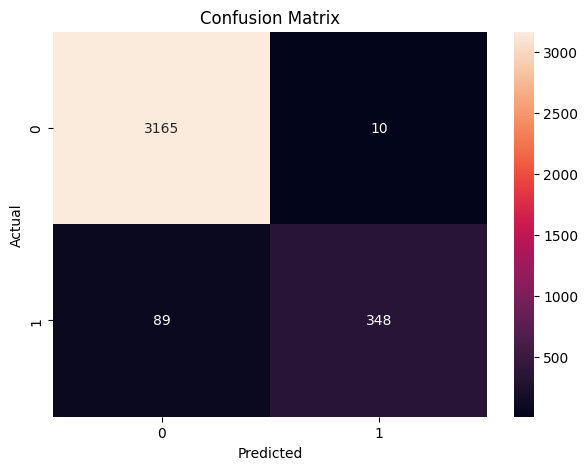

In [ ]:

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy2)


Accuracy: 0.9623477297895903


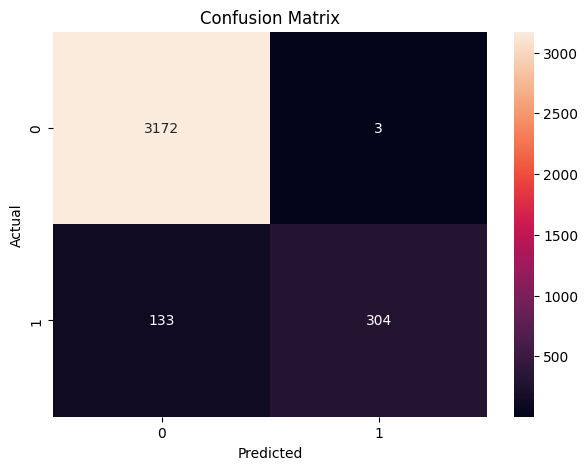

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **CONCLUSION**
In comparing logistic regression and random forest for classification, logistic regression demonstrated a slightly higher accuracy of approximately 97.26%, while random forest achieved an accuracy of about 96.23%. This suggests that logistic regression may be more effective for this specific dataset and task